In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [ ]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

['ہیلو', 'آپ', 'کیسے ہیں', 'نہیں', 'سب', 'میں', 'ہوں', 'طالب علم', 'انجينيئرنگ', 'کا', 'کمپیوٹر']
[10, 7, 4, 8, 1, 0, 5, 2, 3, 6, 9]
کمپیوٹر
طالب علم
سب
انجينيئرنگ
آپ
ہیلو
میں
کیسے ہیں
نہیں
ہوں
کا


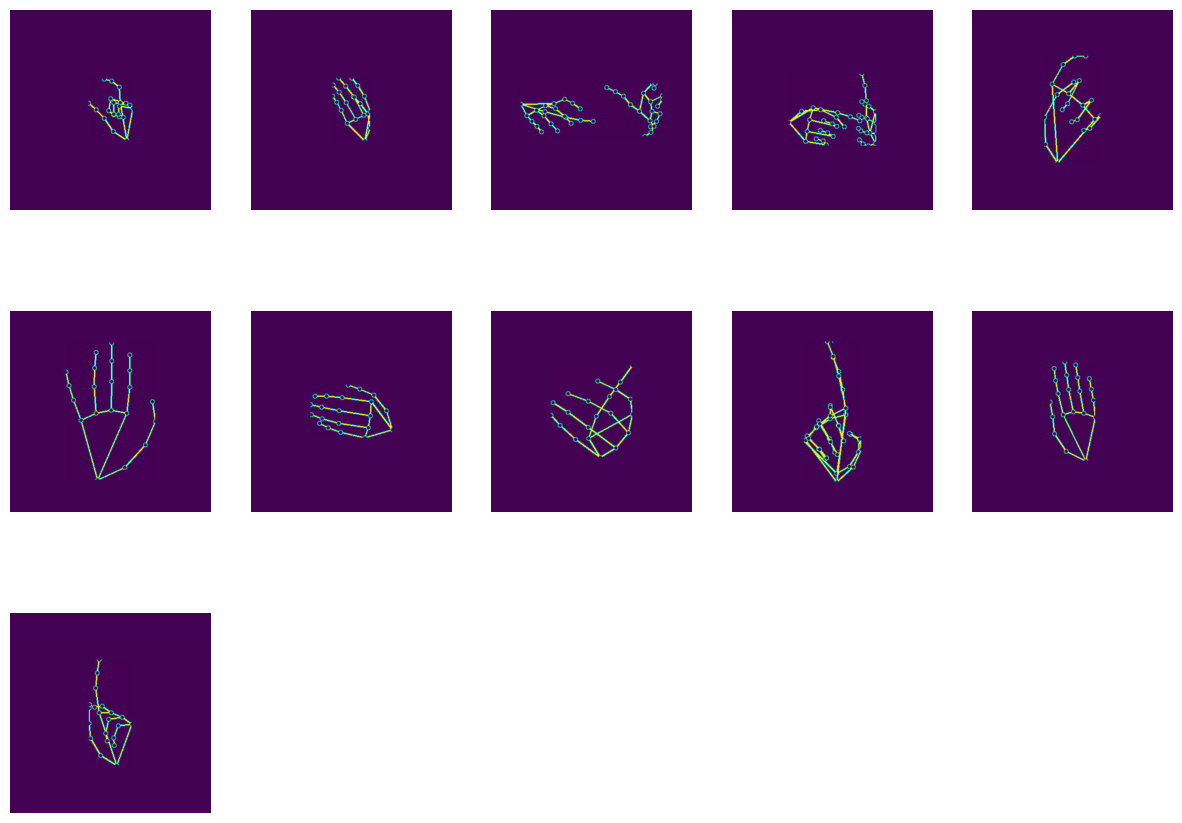

In [ ]:
plt.figure(figsize = (15, 15))
all_classes_names = os.listdir('/content/drive/MyDrive/FinalDataset')
print(all_classes_names)
random_range = random.sample(range(len(all_classes_names)), 11)
print(random_range)

for counter, random_index in enumerate(random_range, 1):

    
    selected_class_Name = all_classes_names[random_index]

    video_files_names_list = os.listdir(f'/content/drive/MyDrive/FinalDataset/{selected_class_Name}')

    selected_video_file_name = random.choice(video_files_names_list)

    video_reader = cv2.VideoCapture(f'/content/drive/MyDrive/FinalDataset/{selected_class_Name}/{selected_video_file_name}')

    _, bgr_frame = video_reader.read()

 
    video_reader.release()

    grey_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2GRAY)

    print(selected_class_Name)
 
   
    
    
    plt.subplot(4, 5, counter);plt.imshow(grey_frame);plt.axis('off')

In [ ]:
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64
SEQUENCE_LENGTH = 30
DATASET_DIR = "/content/drive/MyDrive/FinalDataset"
CLASSES_LIST = ['ہیلو', 'آپ', 'کیسے ہیں', 'نہیں', 'سب', 'میں', 'ہوں', 'طالب علم', 'انجينيئرنگ', 'کا', 'کمپیوٹر']



In [ ]:
def frames_extraction(video_path):
    
    frames_list = []
    
    video_reader = cv2.VideoCapture(video_path)

    
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)

    for frame_counter in range(SEQUENCE_LENGTH):

   
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        success, frame = video_reader.read() 

     
        if not success:
            break

        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        grey_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)

        
      
        frames_list.append(grey_frame)
    
     
    video_reader.release()

    return frames_list

In [ ]:
def create_dataset():

    features = []
    labels = []
    video_files_paths = []

    for class_index, class_name in enumerate(CLASSES_LIST):

        print(f'Extracting Data of Class: {class_name}')
        
        
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
        
        
        for file_name in files_list:
            
           
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

    
            frames = frames_extraction(video_file_path)
            
            if len(frames) == SEQUENCE_LENGTH:

                
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)


    features = np.asarray(features)
    labels = np.array(labels)  

    return features, labels, video_files_paths

In [ ]:
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: ہیلو
Extracting Data of Class: آپ
Extracting Data of Class: کیسے ہیں
Extracting Data of Class: نہیں
Extracting Data of Class: سب
Extracting Data of Class: میں
Extracting Data of Class: ہوں
Extracting Data of Class: طالب علم
Extracting Data of Class: انجينيئرنگ
Extracting Data of Class: کا
Extracting Data of Class: کمپیوٹر


In [ ]:
features[2]

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 

In [ ]:
one_hot_encoded_labels = to_categorical(labels)
print(one_hot_encoded_labels)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels,
                                                                            test_size = 0.25, shuffle = True,
                                                                            random_state = seed_constant)

In [ ]:
def create_convlstm_model():

   
    model = Sequential()

    
    
    model.add(ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = 'tanh',data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True, input_shape = (SEQUENCE_LENGTH,
                                                                                      IMAGE_HEIGHT, IMAGE_WIDTH,1)))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 8, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 14, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 16, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    #model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(Flatten()) 
    
    model.add(Dense(len(CLASSES_LIST), activation = "softmax"))
    
    
    model.summary()
    

    return model


In [ ]:

convlstm_model = create_convlstm_model()


print("Model Created Successfully!")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 30, 62, 62, 4)     736       
                                                                 
 max_pooling3d (MaxPooling3D  (None, 30, 31, 31, 4)    0         
 )                                                               
                                                                 
 time_distributed (TimeDistr  (None, 30, 31, 31, 4)    0         
 ibuted)                                                         
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 30, 29, 29, 8)     3488      
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 30, 15, 15, 8)    0         
 3D)                                                             
                                                        

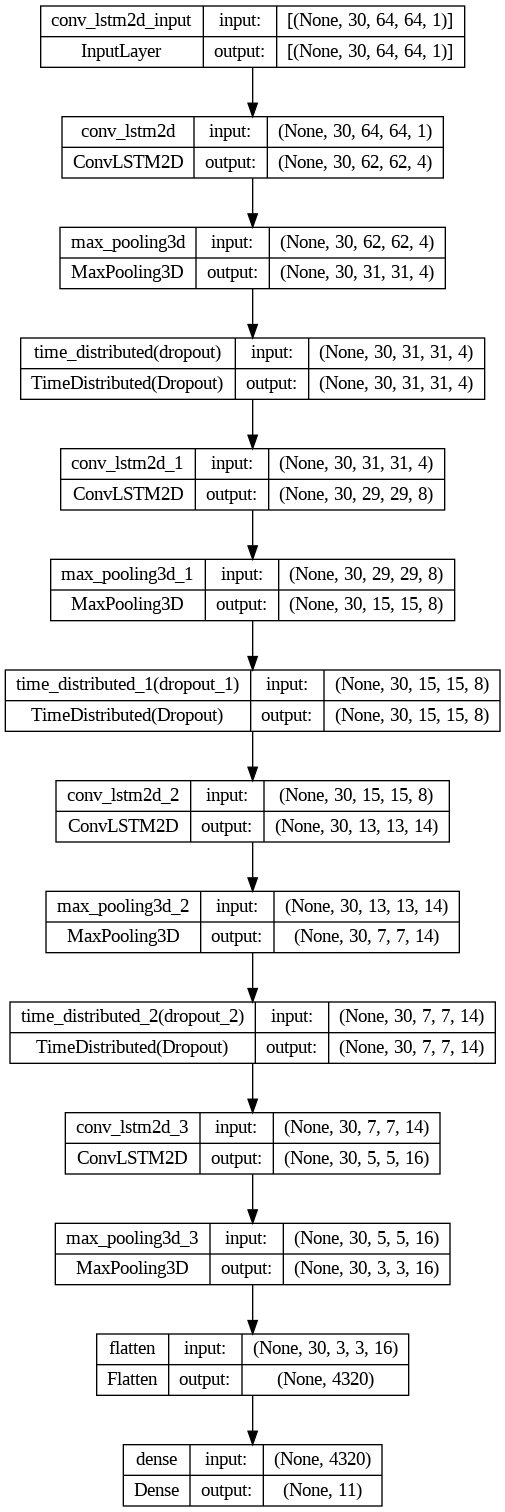

In [ ]:
plot_model(convlstm_model, to_file = 'convlstm_model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)

convlstm_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])


convlstm_model_training_history = convlstm_model.fit(x = features_train, y = labels_train, epochs = 50, batch_size = 4,
                                                     shuffle = True, validation_split = 0.2,
                                                     callbacks = [early_stopping_callback])

Epoch 1/50
110/110 [==============================] - 56s 338ms/step - loss: 1.7877 - accuracy: 0.3795 - val_loss: 0.5232 - val_accuracy: 0.8288
Epoch 2/50
110/110 [==============================] - 35s 319ms/step - loss: 0.4077 - accuracy: 0.8659 - val_loss: 0.5331 - val_accuracy: 0.7928
Epoch 3/50
110/110 [==============================] - 35s 314ms/step - loss: 0.1750 - accuracy: 0.9455 - val_loss: 0.1669 - val_accuracy: 0.9369
Epoch 4/50
110/110 [==============================] - 36s 327ms/step - loss: 0.1104 - accuracy: 0.9614 - val_loss: 0.1083 - val_accuracy: 0.9459
Epoch 5/50
110/110 [==============================] - 34s 311ms/step - loss: 0.0638 - accuracy: 0.9841 - val_loss: 0.0903 - val_accuracy: 0.9640
Epoch 6/50
110/110 [==============================] - 36s 331ms/step - loss: 0.0267 - accuracy: 0.9977 - val_loss: 0.0531 - val_accuracy: 0.9910
Epoch 7/50
110/110 [==============================] - 35s 320ms/step - loss: 0.0126 - accuracy: 0.9955 - val_loss: 0.0761 - val_ac

In [ ]:
model_evaluation_history = convlstm_model.evaluate(features_test, labels_test)

6/6 [==============================] - 1s 103ms/step - loss: 0.0726 - accuracy: 0.9837


In [ ]:
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history


date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)


model_file_name = f'convlstm_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

convlstm_model.save(model_file_name)

In [ ]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    
    

    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    epochs = range(len(metric_value_1))

    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    plt.title(str(plot_name))

    
    plt.legend()

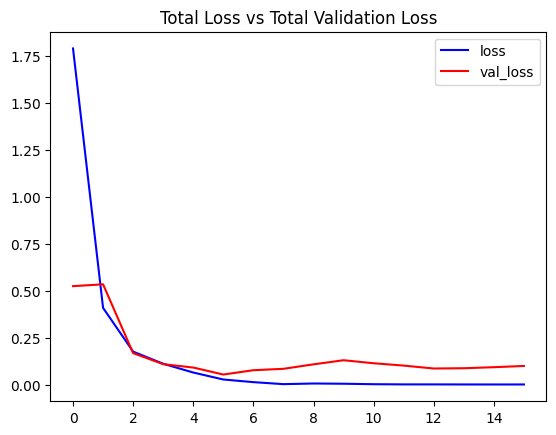

In [ ]:
plot_metric(convlstm_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

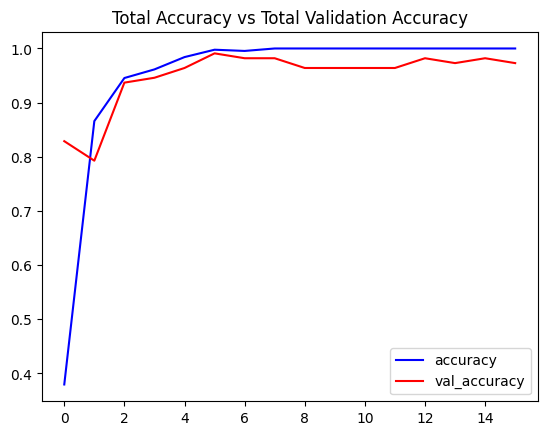

In [ ]:
plot_metric(convlstm_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy') 

In [ ]:
features_test.shape


(184, 30, 64, 64)

In [ ]:
labels_test.shape

(184, 11)

6/6 [==============================] - 1s 97ms/step


/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  f

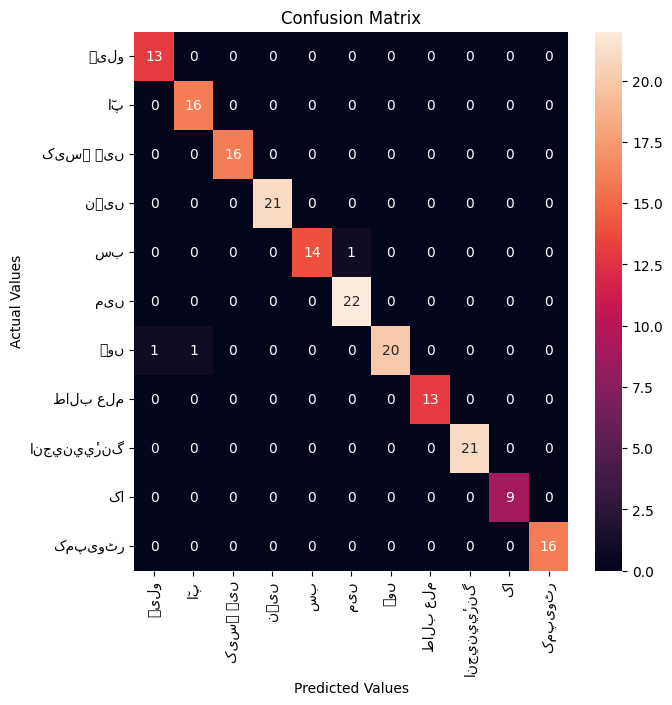

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = convlstm_model.predict(features_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(labels_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['ہیلو', 'آپ', 'کیسے ہیں', 'نہیں', 'سب', 'میں', 'ہوں', 'طالب علم', 'انجينيئرنگ', 'کا', 'کمپیوٹر'], 
                     columns = ['ہیلو', 'آپ', 'کیسے ہیں', 'نہیں', 'سب', 'میں', 'ہوں', 'طالب علم', 'انجينيئرنگ', 'کا', 'کمپیوٹر'])

plt.figure(figsize=(7,7))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
model = tf.keras.models.load_model('/content/convlstm_model___Date_Time_2023_03_10__15_34_59___Loss_0.062035202980041504___Accuracy_0.989130437374115.h5')

In [ ]:
def predict_single_action(video_file_path, SEQUENCE_LENGTH):
   

    video_reader = cv2.VideoCapture(video_file_path)

   
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    frames_list = []
    
    
    predicted_class_name = ''

    
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH),1)

    
    for frame_counter in range(SEQUENCE_LENGTH):

        
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        
        success, frame = video_reader.read() 

        
        if not success:
            break

        
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        grey_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
        
        
        
        frames_list.append(grey_frame)

    
    # predicted_labels_probabilities = convlstm_model.predict(np.expand_dims(frames_list, axis = 0))[0]
    predicted_labels_probabilities = model.predict(np.expand_dims(frames_list, axis = 0))[0]
    print(predicted_labels_probabilities)
    predicted_label = np.argmax(predicted_labels_probabilities)

   
    predicted_class_name = CLASSES_LIST[predicted_label]
    
 
    print(f'Action Predicted: {predicted_class_name}\nConfidence: {predicted_labels_probabilities[predicted_label]}')
        
    video_reader.release()

In [ ]:


input_video_file_path = f'/content/hello.avi'

predict_single_action(input_video_file_path, SEQUENCE_LENGTH)


1/1 [==============================] - 0s 142ms/step
[9.9800652e-01 2.4791398e-06 8.0976162e-07 1.2490030e-06 5.6591502e-12
 3.1206770e-07 1.7653027e-03 2.1800937e-04 2.2005543e-11 5.3159101e-06
 5.8427210e-09]
Action Predicted: ہیلو
Confidence: 0.9980065226554871


In [ ]:


input_video_file_path = f'/content/aap.avi'

predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

1/1 [==============================] - 0s 88ms/step
[4.5788524e-04 9.9856889e-01 1.1885107e-04 3.3774122e-06 2.8847625e-08
 6.2901608e-04 9.9775058e-08 2.1173355e-04 2.5157973e-09 4.7812096e-06
 5.2257578e-06]
Action Predicted: آپ
Confidence: 0.9985688924789429


In [ ]:

input_video_file_path = f'/content/kesayhain.avi'

predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

1/1 [==============================] - 0s 88ms/step
[3.5828447e-03 3.2335141e-05 9.4274485e-01 5.3635817e-02 1.0213785e-07
 2.9463875e-08 6.9389145e-08 1.3440698e-06 7.5771638e-08 1.0175793e-06
 1.4362424e-06]
Action Predicted: کیسے ہیں
Confidence: 0.9427448511123657


In [ ]:

input_video_file_path = f'/content/no.avi'

predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

1/1 [==============================] - 0s 87ms/step
[6.5034267e-04 7.3885876e-01 2.7704470e-02 2.0739253e-01 1.0247515e-08
 5.1648399e-06 9.3097145e-07 4.6744248e-05 6.0578691e-06 2.5334794e-02
 1.3375907e-07]
Action Predicted: آپ
Confidence: 0.7388587594032288


In [ ]:

input_video_file_path = f'/content/ma.avi'

predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

1/1 [==============================] - 0s 124ms/step
[1.1483586e-07 8.3234761e-07 4.8930983e-06 5.3816451e-11 1.8458638e-06
 9.9649006e-01 2.8845538e-13 1.2025792e-07 3.5018374e-03 1.5063954e-13
 1.9369527e-07]
Action Predicted: میں
Confidence: 0.9964900612831116


In [ ]:

input_video_file_path = f'/content/computer.avi'

predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

1/1 [==============================] - 0s 92ms/step
[1.6367389e-03 8.4447441e-07 9.6919715e-01 5.5664637e-05 2.9987593e-08
 2.7936739e-03 1.9490693e-07 5.4633369e-06 2.6244624e-02 7.1231973e-08
 6.5487657e-05]
Action Predicted: کیسے ہیں
Confidence: 0.969197154045105


In [ ]:
['ہیلو', 'آپ', 'کیسے ہیں', 'نہیں', 'سب', 'میں', 'ہوں', 'طالب علم', 'انجينيئرنگ', 'کا', 'کمپیوٹر']

In [ ]:
input_video_file_path = f'/content/hoon.avi'

predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

1/1 [==============================] - 0s 93ms/step
[9.9936396e-01 9.8059536e-05 2.8972221e-05 2.8622383e-06 1.2138373e-09
 1.2205422e-07 1.4470356e-04 1.2021244e-04 2.9619220e-09 2.3844640e-04
 2.6186240e-06]
Action Predicted: ہیلو
Confidence: 0.9993639588356018


In [ ]:
input_video_file_path = f'/content/hoon2.avi'

predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

1/1 [==============================] - 0s 94ms/step
[7.7300100e-04 2.7916443e-05 1.6943017e-07 1.1928465e-03 5.3707777e-10
 3.2424506e-08 9.9036598e-01 7.6354290e-03 4.2634722e-11 2.2767847e-06
 2.2754239e-06]
Action Predicted: ہوں
Confidence: 0.9903659820556641


In [ ]:
input_video_file_path = f'/content/computer2.avi'

predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

1/1 [==============================] - 0s 88ms/step
[4.7674834e-07 4.6895264e-04 4.4937074e-04 2.1711585e-06 4.6225750e-07
 3.3796874e-01 6.2247665e-08 1.8795583e-02 1.0879678e-04 1.2499988e-06
 6.4220423e-01]
Action Predicted: کمپیوٹر
Confidence: 0.642204225063324


In [ ]:
input_video_file_path = f'/content/engineering.avi'

predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

1/1 [==============================] - 0s 88ms/step
[3.7445130e-05 7.4158621e-01 1.7470933e-01 1.9045712e-02 4.5909233e-05
 4.1325234e-02 3.5106126e-07 1.4172693e-03 2.0386567e-02 4.5764932e-07
 1.4454899e-03]
Action Predicted: آپ
Confidence: 0.7415862083435059


In [ ]:
input_video_file_path = f'/content/ka4.avi'

predict_single_action(input_video_file_path, SEQUENCE_LENGTH)

1/1 [==============================] - 0s 129ms/step
[5.0969032e-07 4.6227413e-08 1.5485506e-07 1.0969278e-04 4.9058735e-10
 2.9413969e-09 1.6984737e-06 7.9213868e-07 1.8379559e-10 9.9608177e-01
 3.8052953e-03]
Action Predicted: کا
Confidence: 0.9960817694664001
